In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style='white')

In [4]:
path = "../processed/evaluated/evaluated_497_10_03_2024.csv"

In [5]:
df = pd.read_csv(path)

In [6]:
df.head(3)

,id,instructions,text,kgw-watermarked,non-watermarked,pp-kgw-para-1,pp-unwatermarked-para-1,pp-kgw-para-2,pp-unwatermarked-para-2,pp-kgw-para-3,...,kgw-sent-zscore-1,nowm-sent-zscore-2,nowm-sent-zscore-3,nowm-sent-zscore-1,kgw-word-zscore-2,kgw-word-zscore-3,kgw-word-zscore-1,nowm-word-zscore-2,nowm-word-zscore-3,nowm-word-zscore-1
0,E1898E71ABD6,\nTask:\n1. Research how having positive attit...,A lot of people think that positive attitude i...,Title: Positive Attitude: The Key to Lifelong...,A lot of people think that positive attitude i...,"In the end, countless success stories demonstr...",But I didn’t know that the fact that I was a p...,There are many successful men who have overcom...,"It is said that a person with a good, healthy ...",Hundreds of success stories prove that a posit...,...,-0.328889,0.432049,0.417620,0.775771,4.402255,3.333333,2.522040,-0.149470,0.800327,0.164771
1,C4CFCB3B7F13,\nTask: Write an essay evaluating the school's...,Dear principal today i would like to write abo...,Title: A Healthier School Lunch: A Step Forwa...,Dear principal today i would like to write abo...,But the transition may be bumpy and need to be...,I agree with the plan for changing the school ...,Although I support the inclusion of more nutri...,I agree with the idea that a healthy diet is b...,"But this transition is hard, and the teachers,...",...,2.920198,-1.043318,0.612266,0.033168,4.041452,1.738412,2.599042,1.418416,0.157786,0.819705
2,78303F7A5AB0,\nTask: Write an essay that explores the impor...,My Dad is someone who has shared wisdom and ex...,Title: The Invaluable Guidance of Parents: A ...,My Dad is someone who has shared wisdom and ex...,"A relationship founded on respect, understandi...","Then I think it's clear that everyone, even a ...","Moreover, when we witness the wisdom of our el...","It is very clear that all people, even wise on...",When they are in the formative years of their ...,...,2.457366,-1.245174,-0.618853,-0.638678,7.167026,6.803745,3.680460,0.782362,0.308062,0.791924


In [7]:
kgw_wm_zscore = np.array(df["kgw-wm-zscore"])
non_wm_zscore = np.array(df["non-wm-zscore"])

In [8]:
no_of_paraphrases = 3
wmarked_paraphrased_scores = np.zeros(shape=(no_of_paraphrases, len(kgw_wm_zscore)))
nmarked_paraphrased_scores = np.zeros(shape=(no_of_paraphrases, len(kgw_wm_zscore)))

In [9]:
for i in range(1, no_of_paraphrases+1):
    wmarked_paraphrased_scores[i-1] = df[f"kgw-para-zscore-{i}"]
    nmarked_paraphrased_scores[i-1] = df[f"nowm-para-zscore-{i}"]

In [10]:
def comparison(arr_1, arr_2):
    arr_1_mean = arr_1.mean()
    arr_2_mean = arr_2.mean()
    
    arr_1_std = arr_1.std()
    arr_2_std = arr_2.std()
    
    print(f"base mean: {arr_1_mean:.4f}, pp mean: {arr_2_mean:.4f}")
    print(f"base std: {arr_1_std:.4f}, pp mean: {arr_2_std:.4f}")

In [11]:
comparison(kgw_wm_zscore, non_wm_zscore)

base mean: 11.7577, pp mean: 0.0785
base std: 2.8074, pp mean: 0.9825


## Scatter Plot Visualisation

In [15]:
image_path = "../results/recursive-word-paraphrasing/"

sns.set_theme(style='white')

In [20]:
sns.set_palette("pastel")
pp_type = "sent"
sampled_df = df

kgw_z_scores = sampled_df["kgw-wm-zscore"]
kgw_pp_z_scores = sampled_df[f"kgw-{pp_type}-zscore-1"]

z_threshold = 4.0

C:\Users\Sam\anaconda3\envs\wmark-pt\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sam\anaconda3\envs\wmark-pt\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


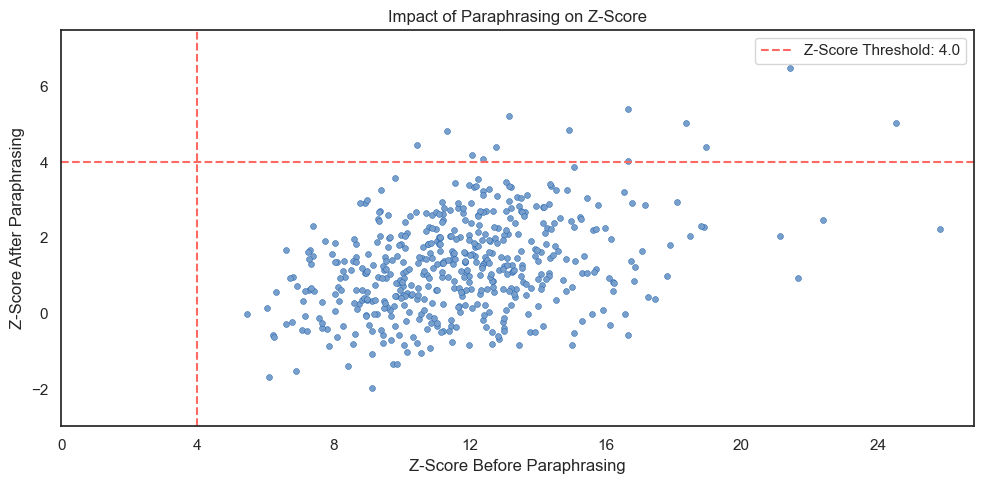

In [21]:
fig, axs = plt.subplots(figsize=(10, 5))

sns.scatterplot(x=kgw_z_scores, y=kgw_pp_z_scores, ax=axs, color='#789FCC', edgecolor="#1E60AD", s=18)

axs.set_xlabel("Z-Score Before Paraphrasing")
axs.set_ylabel("Z-Score After Paraphrasing")

left = min(0, np.min(kgw_z_scores)-1)
right = max(kgw_z_scores)+1
bottom = min(0, np.min(kgw_pp_z_scores)-1)
top = max(kgw_pp_z_scores) + 1

axs.set_xlim(left=left, right=right)
axs.set_ylim(bottom=bottom, top=top)
axs.axhline(z_threshold, label='Z-Score Threshold: 4.0', color='#FF6961', linestyle='--')
axs.axvline(z_threshold, color='#FF6961', linestyle='--')

axs.set_xticks(list(range(0, np.ceil(right).astype(np.int32), 4)))

axs.set_title("Impact of Paraphrasing on Z-Score")
axs.grid(which='minor')

plt.legend()
plt.tight_layout()

# plt.savefig(f"{image_path}/z-score-comparison.pdf", bbox_inches='tight', format='pdf')

plt.show()

## Barplot Visualisation Attempt

In [182]:
sns.set_theme(style='white')

In [183]:
sampled_df = df.sample(100).reset_index()

kgw_z_scores = sampled_df["kgw-wm-zscore"]
kgw_pp_z_scores = sampled_df["kgw-sent-zscore-1"]

ordering = np.argsort(kgw_z_scores)[::-1]
kgw_z_scores = kgw_z_scores[ordering]
kgw_pp_z_scores = kgw_pp_z_scores[ordering]

z_threshold = 4.0

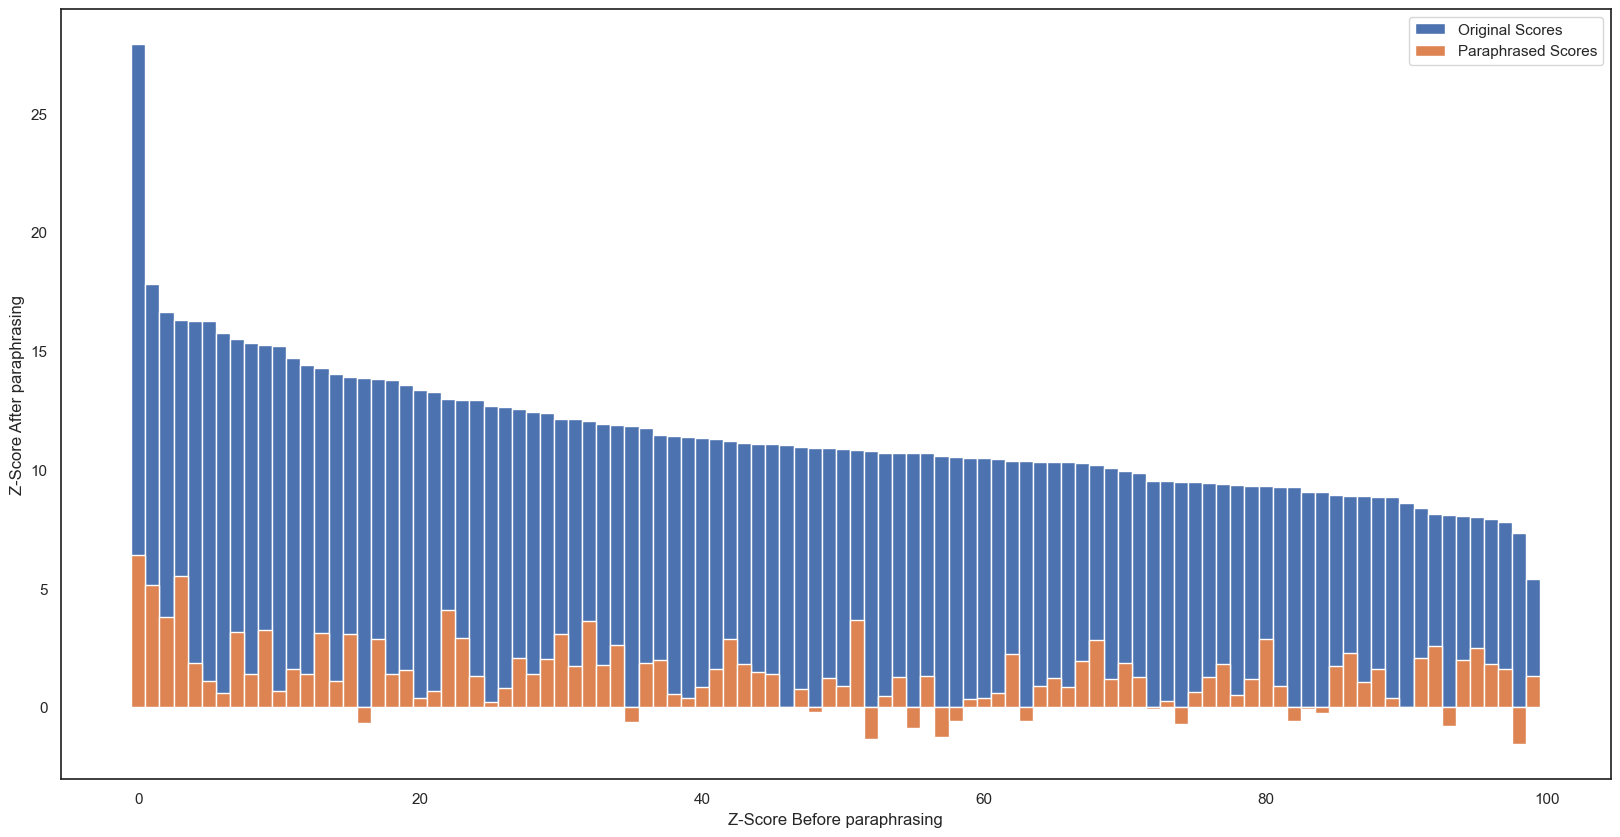

In [184]:
fig, axs = plt.subplots(figsize=(20, 10))

axs.bar(x=list(range(kgw_z_scores.shape[0])), height=kgw_z_scores, width=1, label='Original Scores')
axs.bar(x=list(range(kgw_z_scores.shape[0])), height=kgw_pp_z_scores, width=1, label='Paraphrased Scores')
# sns.barplot(x=list(range(kgw_z_scores.shape[0])), y=kgw_z_scores, ax=axs)

axs.set_xlabel("Z-Score Before paraphrasing")
axs.set_ylabel("Z-Score After paraphrasing")

plt.legend()

plt.show()